# Telecom Churn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
churn_df=pd.read_csv('churn_data.csv')
internet_df=pd.read_csv('internet_data.csv')
customer_df=pd.read_csv('customer_data.csv')


In [3]:
churn_df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
internet_df.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [5]:
customer_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [7]:
print(len(churn_df))
print(len(internet_df))
print(len(customer_df))

7043
7043
7043


In [8]:
temp=pd.merge(churn_df,internet_df,on='customerID',how='inner')

In [9]:
telecom_df=pd.merge(temp,customer_df,on='customerID',how='inner')

In [10]:
telecom_df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,No phone service,...,No,Yes,No,No,No,No,Female,0,Yes,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,No,...,Yes,No,Yes,No,No,No,Male,0,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No,...,Yes,Yes,No,No,No,No,Male,0,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,No phone service,...,Yes,No,Yes,Yes,No,No,Male,0,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,No,...,No,No,No,No,No,No,Female,0,No,No


In [11]:
telecom_df.shape

(7043, 21)

In [12]:
telecom_df.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [13]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
dtypes: float64(1), int64(2), obj

In [14]:
telecom_df[['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']]=telecom_df[['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']].apply(lambda x:x.map({'Yes': 1, "No": 0}))

In [15]:
telecom_df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,No phone service,...,No,Yes,No,No,No,No,Female,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,No,...,Yes,No,Yes,No,No,No,Male,0,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,No,...,Yes,Yes,No,No,No,No,Male,0,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,No phone service,...,Yes,No,Yes,Yes,No,No,Male,0,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,No,...,No,No,No,No,No,No,Female,0,0,0


In [16]:
telecom_df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [17]:
temp=pd.get_dummies(telecom_df[['Contract', 'PaymentMethod', 'gender', 'InternetService']],drop_first=True)
telecom_df=pd.concat([telecom_df,temp],axis=1)

In [18]:
telecom_df.drop(['Contract', 'PaymentMethod', 'gender', 'InternetService'],axis=1,inplace=True)

In [19]:
telecom_df.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines,OnlineSecurity,OnlineBackup,...,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,1,29.85,29.85,0,No phone service,No,Yes,...,1,0,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,No,Yes,No,...,0,0,1,0,0,0,1,1,0,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,No,Yes,Yes,...,0,0,0,0,0,0,1,1,0,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,No phone service,Yes,No,...,0,0,1,0,0,0,0,1,0,0
4,9237-HQITU,2,1,1,70.70,151.65,1,No,No,No,...,0,0,0,0,0,1,0,0,1,0


In [20]:
telecom_df['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [21]:
temp=pd.get_dummies(telecom_df[['MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                                'DeviceProtection','TechSupport','StreamingTV','StreamingMovies']]).drop(['MultipleLines_No phone service','OnlineSecurity_No internet service','OnlineBackup_No internet service','DeviceProtection_No internet service',
'TechSupport_No internet service','StreamingTV_No internet service','StreamingMovies_No internet service'],axis=1)
telecom_df=pd.concat([telecom_df,temp],axis=1)

In [22]:
telecom_df.drop(['MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                                'DeviceProtection','TechSupport','StreamingTV','StreamingMovies'],inplace=True,axis=1)

In [23]:
telecom_df.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [24]:
telecom_df['TotalCharges']=telecom_df['TotalCharges'].convert_objects(convert_numeric=True)

In [25]:
telecom_df['TotalCharges'].isna().sum()

11

In [26]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
customerID                               7043 non-null object
tenure                                   7043 non-null int64
PhoneService                             7043 non-null int64
PaperlessBilling                         7043 non-null int64
MonthlyCharges                           7043 non-null float64
TotalCharges                             7032 non-null float64
Churn                                    7043 non-null int64
SeniorCitizen                            7043 non-null int64
Partner                                  7043 non-null int64
Dependents                               7043 non-null int64
Contract_One year                        7043 non-null uint8
Contract_Two year                        7043 non-null uint8
PaymentMethod_Credit card (automatic)    7043 non-null uint8
PaymentMethod_Electronic check           7043 non-null uint8
PaymentMethod_Mailed check        

In [27]:
(telecom_df.isna().sum()/len(telecom_df.index))*100

customerID                               0.000000
tenure                                   0.000000
PhoneService                             0.000000
PaperlessBilling                         0.000000
MonthlyCharges                           0.000000
TotalCharges                             0.156183
Churn                                    0.000000
SeniorCitizen                            0.000000
Partner                                  0.000000
Dependents                               0.000000
Contract_One year                        0.000000
Contract_Two year                        0.000000
PaymentMethod_Credit card (automatic)    0.000000
PaymentMethod_Electronic check           0.000000
PaymentMethod_Mailed check               0.000000
gender_Male                              0.000000
InternetService_Fiber optic              0.000000
InternetService_No                       0.000000
MultipleLines_No                         0.000000
MultipleLines_Yes                        0.000000


In [28]:
telecom_df=telecom_df[~telecom_df['TotalCharges'].isna()]

In [29]:
(telecom_df.isna().sum()/len(telecom_df.index))*100

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

In [30]:
telecom_df.shape

(7032, 32)

In [31]:
num_var=['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']

In [32]:
telecom_df[num_var].describe(percentiles=[.25,.5,.75,.90,.99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,0.162400,2283.300441
std,24.545260,30.085974,0.368844,2266.771362
min,1.000000,18.250000,0.000000,18.800000
25%,9.000000,35.587500,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.862500,0.000000,3794.737500
90%,69.000000,102.645000,1.000000,5976.640000
99%,72.000000,114.734500,1.000000,8039.883000
max,72.000000,118.750000,1.000000,8684.800000


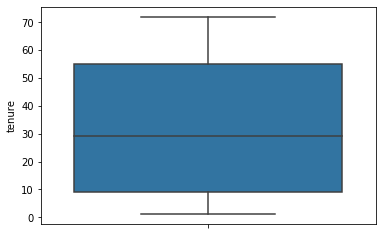

In [33]:
sns.boxplot(telecom_df['tenure'],orient='v')

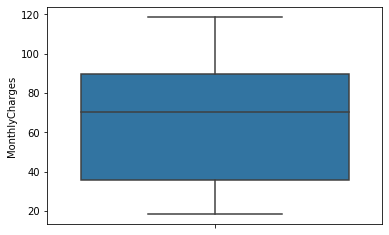

In [34]:
sns.boxplot(telecom_df['MonthlyCharges'],orient='v')

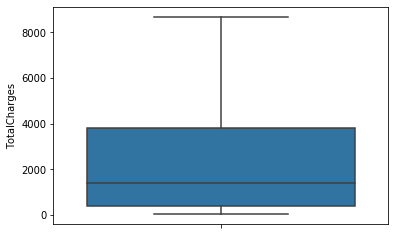

In [35]:
sns.boxplot(telecom_df['TotalCharges'],orient='v')

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X=telecom_df.drop(['Churn','customerID'],axis=1)

In [38]:
X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,1,0,...,1,0,0,1,1,0,1,0,1,0
2,2,1,1,53.85,108.15,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,1,0,...,1,0,0,1,0,1,1,0,1,0
4,2,1,1,70.70,151.65,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [39]:
y=telecom_df['Churn']

In [40]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler=StandardScaler()

In [44]:
X_train[['tenure','MonthlyCharges','TotalCharges']]=scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
879,0.019693,1,1,-0.338074,-0.276449,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
5790,0.305384,0,1,-0.464443,-0.112702,0,1,1,0,0,...,0,1,1,0,1,0,0,1,0,1
6498,-1.286319,1,1,0.581425,-0.974430,0,0,0,0,0,...,0,1,0,1,1,0,1,0,1,0
880,-0.919003,1,1,1.505913,-0.550676,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
2784,-1.163880,1,1,1.106854,-0.835971,0,0,1,0,0,...,1,0,0,1,0,1,0,1,0,1


In [45]:
X_test[['tenure','MonthlyCharges','TotalCharges']]=scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])
X_test.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
942,-0.347623,1,1,0.499951,-0.128378,0,0,0,0,0,...,1,0,1,0,1,0,1,0,0,1
3730,0.999203,1,1,1.319685,1.600302,0,1,0,0,0,...,0,1,0,1,1,0,0,1,0,1
1761,1.040015,1,1,-1.342374,-0.343297,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2283,-1.286319,1,1,0.223935,-0.979170,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
1872,0.346196,1,0,-1.500335,-0.656086,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [46]:
sum(telecom_df['Churn'])/len(telecom_df.index)

0.26578498293515357

In [47]:
#correlation

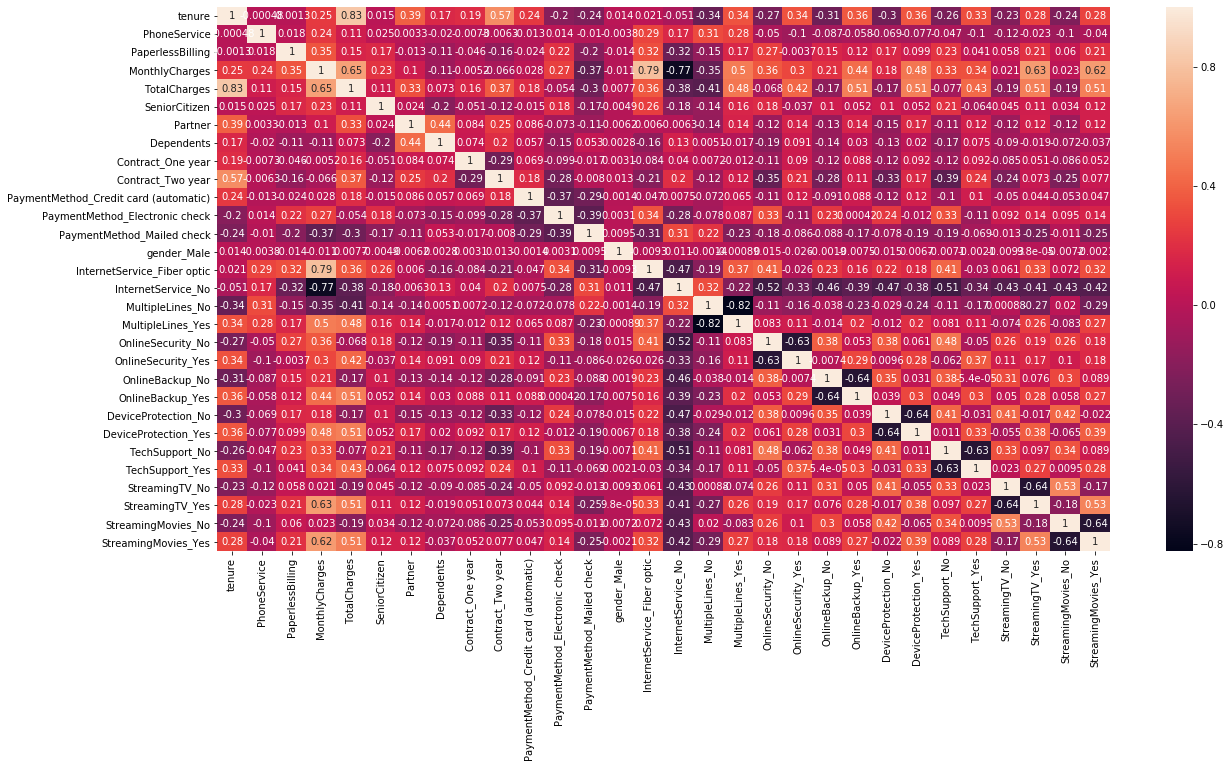

In [48]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train.corr(),annot=True)

In [49]:
X_test = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'], 1)
X_train = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                         'StreamingTV_No','StreamingMovies_No'], 1)

In [50]:
import statsmodels.api as sm

In [51]:
logm1=sm.GLM(y_train,sm.add_constant(X_train),family=sm.families.Binomial())

In [52]:
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Sun, 03 Nov 2019   Deviance:                       4009.4
Time:                        12:09:44   Pearson chi2:                 6.07e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9382      1.546     -2.547      0.011      -6.969      -0.908
tenure                                   -1.5172      0.189     -8.015      0.000      -1.888      -1.146
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
MonthlyCharges                           -2.1806      1.160     -1.880      0.060      -4.454       0.092
TotalCharges                              0.7332      0.198      3.705      0.000       0.345       1.121
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
=========================================================================================================
"""

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [54]:
logreg=LogisticRegression()

In [55]:
lrmodel=logreg.fit(X_train,y_train)

In [56]:
rfe=RFE(lrmodel,15)

In [57]:
rfe=rfe.fit(X_train,y_train)

In [58]:
features=pd.DataFrame(zip(telecom_df.columns,rfe.support_,rfe.ranking_),columns=['Features','Support','Ranking'])

In [59]:
col=X_train.columns[rfe.support_]

In [60]:
col

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'TotalCharges',
       'SeniorCitizen', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No',
       'MultipleLines_Yes', 'OnlineSecurity_Yes', 'TechSupport_Yes',
       'StreamingTV_Yes'],
      dtype='object')

In [61]:
X_train.columns[~rfe.support_]

Index(['MonthlyCharges', 'Partner', 'Dependents',
       'PaymentMethod_Electronic check', 'gender_Male', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'StreamingMovies_Yes'],
      dtype='object')

In [62]:
X_train_sm=sm.add_constant(X_train[col])

In [63]:
logm2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()

In [64]:
logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2011.8
Date:                Sun, 03 Nov 2019   Deviance:                       4023.5
Time:                        12:12:31   Pearson chi2:                 6.22e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.0343      0.171     -6.053      0.000      -1.369      -0.699
tenure                                   -1.5386      0.184     -8.381      0.000      -1.898      -1.179
PhoneService                             -0.5231      0.161     -3.256      0.001      -0.838      -0.208
PaperlessBilling                          0.3397      0.090      3.789      0.000       0.164       0.515
TotalCharges                              0.7116      0.188      3.794      0.000       0.344       1.079
SeniorCitizen                             0.4294      0.100      4.312      0.000       0.234       0.625
Contract_One year                        -0.6813      0.128     -5.334      0.000      -0.932      -0.431
Contract_Two year                        -1.2680      0.211     -6.011      0.000      -1.681      -0.855
PaymentMethod_Credit card (automatic)    -0.3775      0.113     -3.352      0.001      -0.598      -0.157
PaymentMethod_Mailed check               -0.3760      0.111     -3.389      0.001      -0.594      -0.159
InternetService_Fiber optic               0.7421      0.117      6.317      0.000       0.512       0.972
InternetService_No                       -0.9385      0.166     -5.650      0.000      -1.264      -0.613
MultipleLines_Yes                         0.2086      0.096      2.181      0.029       0.021       0.396
OnlineSecurity_Yes                       -0.4049      0.102     -3.968      0.000      -0.605      -0.205
TechSupport_Yes                          -0.3967      0.102     -3.902      0.000      -0.596      -0.197
StreamingTV_Yes                           0.2747      0.094      2.911      0.004       0.090       0.460
=========================================================================================================
"""

In [65]:
y_train_predict=logm2.predict(X_train_sm)
y_train_predict[:10]

879     0.225111
5790    0.274893
6498    0.692126
880     0.504909
2784    0.645261
3874    0.417544
5387    0.420131
6623    0.809427
4465    0.223211
5364    0.512246
dtype: float64

In [66]:
y_train_predict=y_train_predict.values.reshape(-1)
y_train_predict[:10]

array([0.22511138, 0.27489289, 0.69212611, 0.50490896, 0.6452606 ,
       0.41754449, 0.42013086, 0.80942651, 0.2232105 , 0.51224637])

In [67]:
pred=pd.DataFrame({'churn':y_train,'churn_prob':y_train_predict})
pred['CustID']=y_train.index

In [68]:
pred.head()

,churn,churn_prob,CustID
879,0,0.225111,879
5790,0,0.274893,5790
6498,1,0.692126,6498
880,1,0.504909,880
2784,1,0.645261,2784


In [69]:
pred['Predicted']=pred['churn_prob'].apply(lambda x: 1 if x>0.5 else 0)

In [70]:
pred.head()

,churn,churn_prob,CustID,Predicted
879,0,0.225111,879,0
5790,0,0.274893,5790,0
6498,1,0.692126,6498,1
880,1,0.504909,880,1
2784,1,0.645261,2784,1


In [71]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [72]:
accuracy_score(pred['churn'],pred['Predicted'])

0.8082080455099553

In [73]:
confusion_matrix(pred['churn'],pred['Predicted'])

array([[3270,  365],
       [ 579,  708]], dtype=int64)

In [74]:
print(classification_report(pred['churn'],pred['Predicted']))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      3635
           1       0.66      0.55      0.60      1287

    accuracy                           0.81      4922
   macro avg       0.75      0.72      0.74      4922
weighted avg       0.80      0.81      0.80      4922



In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [76]:
def VIF(X_train):
    vif=pd.DataFrame()
    vif['Features']=col
    vif['VIF']=[variance_inflation_factor(X_train[col].values,i) for i in range(len(col))]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values(by='VIF',ascending=False)
    print(vif)

In [77]:
col=col.drop('PhoneService')

In [78]:
X_train_sm=sm.add_constant(X_train[col])
logm3=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
logm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2017.0
Date:                Sun, 03 Nov 2019   Deviance:                       4034.0
Time:                        12:12:54   Pearson chi2:                 5.94e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.3885      0.133    -10.437      0.000      -1.649      -1.128
tenure                                   -1.4138      0.179     -7.884      0.000      -1.765      -1.062
PaperlessBilling                          0.3425      0.089      3.829      0.000       0.167       0.518
TotalCharges                              0.5936      0.184      3.225      0.001       0.233       0.954
SeniorCitizen                             0.4457      0.099      4.486      0.000       0.251       0.640
Contract_One year                        -0.6905      0.128     -5.411      0.000      -0.941      -0.440
Contract_Two year                        -1.2646      0.211     -6.002      0.000      -1.678      -0.852
PaymentMethod_Credit card (automatic)    -0.3785      0.113     -3.363      0.001      -0.599      -0.158
PaymentMethod_Mailed check               -0.3769      0.111     -3.407      0.001      -0.594      -0.160
InternetService_Fiber optic               0.6241      0.111      5.645      0.000       0.407       0.841
InternetService_No                       -1.0940      0.158     -6.919      0.000      -1.404      -0.784
MultipleLines_Yes                         0.1607      0.094      1.712      0.087      -0.023       0.345
OnlineSecurity_Yes                       -0.4094      0.102     -4.016      0.000      -0.609      -0.210
TechSupport_Yes                          -0.4085      0.101     -4.025      0.000      -0.607      -0.210
StreamingTV_Yes                           0.3077      0.094      3.277      0.001       0.124       0.492
=========================================================================================================
"""

In [79]:
y_train_predict=logm3.predict(X_train_sm)
pred=pd.DataFrame({'churn':y_train,'churn_prob':y_train_predict})
pred['CustID']=y_train.index
pred['Predicted']=pred['churn_prob'].apply(lambda x: 1 if x>0.5 else 0)

In [80]:
accuracy_score(pred['churn'],pred['Predicted'])

0.8051605038602194

In [81]:
VIF(X_train_sm)

                                 Features   VIF
2                            TotalCharges  7.30
0                                  tenure  6.79
5                       Contract_Two year  3.16
8             InternetService_Fiber optic  2.94
9                      InternetService_No  2.53
1                        PaperlessBilling  2.52
13                        StreamingTV_Yes  2.31
10                      MultipleLines_Yes  2.27
12                        TechSupport_Yes  2.00
4                       Contract_One year  1.83
11                     OnlineSecurity_Yes  1.80
7              PaymentMethod_Mailed check  1.66
6   PaymentMethod_Credit card (automatic)  1.44
3                           SeniorCitizen  1.31


In [82]:
col=col.drop('TotalCharges')

In [83]:
X_train_sm=sm.add_constant(X_train[col])
logm4=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
logm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2022.5
Date:                Sun, 03 Nov 2019   Deviance:                       4044.9
Time:                        12:12:58   Pearson chi2:                 5.22e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.4695      0.130    -11.336      0.000      -1.724      -1.215
tenure                                   -0.8857      0.065    -13.553      0.000      -1.014      -0.758
PaperlessBilling                          0.3367      0.089      3.770      0.000       0.162       0.512
SeniorCitizen                             0.4517      0.100      4.527      0.000       0.256       0.647
Contract_One year                        -0.6792      0.127     -5.360      0.000      -0.927      -0.431
Contract_Two year                        -1.2308      0.208     -5.903      0.000      -1.639      -0.822
PaymentMethod_Credit card (automatic)    -0.3827      0.113     -3.399      0.001      -0.603      -0.162
PaymentMethod_Mailed check               -0.3393      0.110     -3.094      0.002      -0.554      -0.124
InternetService_Fiber optic               0.7914      0.098      8.109      0.000       0.600       0.983
InternetService_No                       -1.1205      0.157     -7.127      0.000      -1.429      -0.812
MultipleLines_Yes                         0.2166      0.092      2.355      0.019       0.036       0.397
OnlineSecurity_Yes                       -0.3739      0.101     -3.684      0.000      -0.573      -0.175
TechSupport_Yes                          -0.3611      0.101     -3.591      0.000      -0.558      -0.164
StreamingTV_Yes                           0.3995      0.089      4.465      0.000       0.224       0.575
=========================================================================================================
"""

In [84]:
y_train_predict=logm4.predict(X_train_sm)
pred=pd.DataFrame({'churn':y_train,'churn_prob':y_train_predict})
pred['CustID']=y_train.index
pred['Predicted']=pred['churn_prob'].apply(lambda x: 1 if x>0.5 else 0)

In [85]:
accuracy_score(pred['churn'],pred['Predicted'])

0.804754164973588

In [86]:
VIF(X_train_sm)

                                 Features   VIF
4                       Contract_Two year  3.07
7             InternetService_Fiber optic  2.60
1                        PaperlessBilling  2.44
9                       MultipleLines_Yes  2.24
12                        StreamingTV_Yes  2.17
8                      InternetService_No  2.12
0                                  tenure  2.04
11                        TechSupport_Yes  1.98
3                       Contract_One year  1.82
10                     OnlineSecurity_Yes  1.78
6              PaymentMethod_Mailed check  1.66
5   PaymentMethod_Credit card (automatic)  1.44
2                           SeniorCitizen  1.31


In [87]:
confusion=confusion_matrix(pred['churn'],pred['Predicted'])

In [88]:
confusion

array([[3269,  366],
       [ 595,  692]], dtype=int64)

In [89]:
from sklearn.metrics import roc_curve,roc_auc_score

In [90]:
area=roc_auc_score(pred['churn'],pred['churn_prob'])

In [91]:
fpr,tpr,thres=roc_curve(pred['churn'],pred['churn_prob'],drop_intermediate=False)

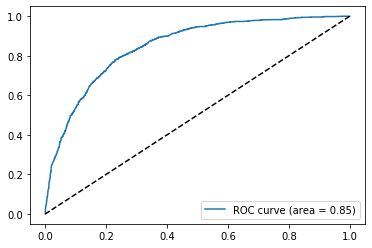

In [92]:
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' %area)
plt.plot([1,0],[1,0],'k--')
plt.legend()
plt.show()

In [93]:
'ROC curve (area = %0.2f)' %area

'ROC curve (area = 0.85)'

In [94]:
for i in np.arange(0,1,0.1):
    pred[round(i,1)]=pred['churn_prob'].apply(lambda x: 1 if x>i else 0)

In [95]:
pred.head()

,churn,churn_prob,CustID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
879,0,0.282193,879,0,1,1,1,0,0,0,0,0,0,0
5790,0,0.268192,5790,0,1,1,1,0,0,0,0,0,0,0
6498,1,0.689531,6498,1,1,1,1,1,1,1,1,0,0,0
880,1,0.534214,880,1,1,1,1,1,1,1,0,0,0,0
2784,1,0.674332,2784,1,1,1,1,1,1,1,1,0,0,0


In [97]:
# sensitivity=TP/Total Positive
# specificity=FN/Total Negative


In [98]:
metr_df=pd.DataFrame(columns=['prob','accuracy','sensitivity','specificity'])
for i in [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    # TP = confusion[1,1] # true positive 
    # TN = confusion[0,0] # true negatives
    # FP = confusion[0,1] # false positives
    # FN = confusion[1,0] # false negatives
    cm1=confusion_matrix(pred['churn'],pred[i])
    total=sum(sum(cm1))
    accuracy=(cm1[0,0]+cm1[1,1])/total
    sensitivity=cm1[1,1]/(cm1[1,0]+cm1[1,1])
    specificity=cm1[0,0]/(cm1[0,1]+cm1[0,0])
    metr_df.loc[i]=[i,accuracy,sensitivity,specificity]

In [99]:
metr_df

,prob,accuracy,sensitivity,specificity
0.0,0.0,0.261479,1.000000,0.000000
0.1,0.1,0.619667,0.946387,0.503989
0.2,0.2,0.722674,0.850039,0.677579
0.3,0.3,0.771434,0.780109,0.768363
0.4,0.4,0.795002,0.671329,0.838790
0.5,0.5,0.804754,0.537685,0.899312
0.6,0.6,0.800284,0.385392,0.947180
0.7,0.7,0.779764,0.205128,0.983219
0.8,0.8,0.749289,0.050505,0.996699
0.9,0.9,0.738521,0.000000,1.000000


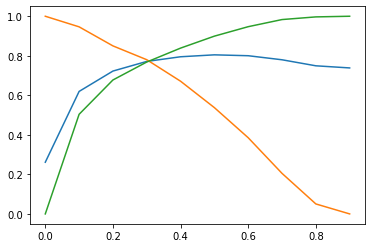

In [100]:
plt.plot(metr_df['prob'],metr_df['accuracy'])
plt.plot(metr_df['prob'],metr_df['sensitivity'])
plt.plot(metr_df['prob'],metr_df['specificity'])

In [101]:
y_train_predict=logm4.predict(X_train_sm)
pred=pd.DataFrame({'churn':y_train,'churn_prob':y_train_predict})
pred['CustID']=y_train.index
pred['Predicted']=pred['churn_prob'].apply(lambda x: 1 if x>0.3 else 0)

In [102]:
pred.head()

,churn,churn_prob,CustID,Predicted
879,0,0.282193,879,0
5790,0,0.268192,5790,0
6498,1,0.689531,6498,1
880,1,0.534214,880,1
2784,1,0.674332,2784,1


In [105]:
accuracy_score(pred['churn'],pred['Predicted'])

0.771434376269809

## PCA 

In [106]:
from sklearn.decomposition import PCA

In [107]:
pca=PCA(random_state=42)

In [108]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [109]:
pca.components_

array([[ 4.51013252e-01,  2.00874021e-02,  7.01639045e-02,
         4.79974007e-01,  5.70998609e-01,  3.42906770e-02,
         9.78680497e-02,  1.33467435e-02,  2.99418827e-02,
         7.81273710e-02,  4.43983437e-02,  1.26558899e-02,
        -9.87428422e-02,  3.35996212e-04,  1.44618971e-01,
        -1.31620315e-01,  1.57692647e-01,  1.17124712e-01,
         1.55481095e-01,  1.61492419e-01,  1.24652392e-01,
         1.76147607e-01,  1.77166099e-01],
       [ 5.62923681e-01, -4.09449799e-02, -1.72117497e-01,
        -5.28751991e-01,  1.74133004e-01, -8.28314859e-02,
         1.47808200e-01,  1.41427413e-01,  6.21051024e-02,
         2.32911130e-01,  9.09064500e-02, -2.27957593e-01,
         6.88685612e-02,  1.02814655e-02, -2.96255979e-01,
         2.14485388e-01, -5.52494943e-02,  5.51767106e-02,
        -6.43639289e-03, -1.75990164e-02,  3.77046362e-02,
        -1.20282917e-01, -1.17956755e-01],
       [-2.50134004e-01, -1.81331487e-01, -1.50442078e-01,
         6.76764907e-02, -4.6

In [110]:
pca.explained_variance_ratio_

array([3.96725472e-01, 1.65340912e-01, 4.74667988e-02, 3.93465997e-02,
       3.53222802e-02, 3.35984987e-02, 3.03414295e-02, 2.91310636e-02,
       2.79345688e-02, 2.67061393e-02, 2.17784867e-02, 2.05509411e-02,
       1.99594530e-02, 1.85975244e-02, 1.74304952e-02, 1.56156982e-02,
       1.39884073e-02, 1.15242076e-02, 8.83240196e-03, 7.39982525e-03,
       6.78625010e-03, 5.57206375e-03, 5.04838056e-05])

In [111]:
var_cum=np.cumsum(pca.explained_variance_ratio_)

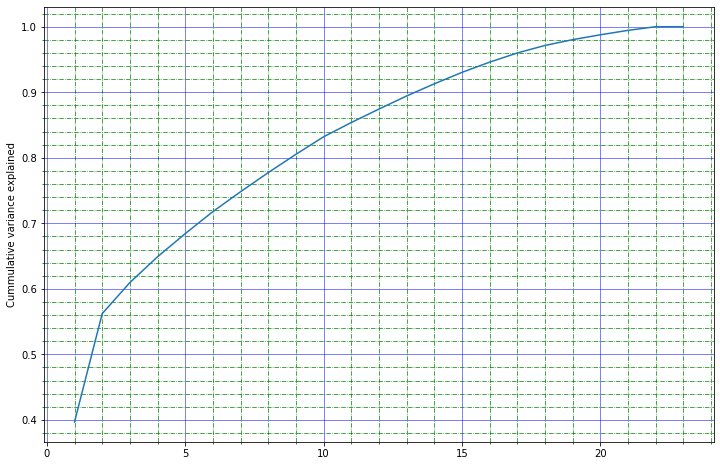

In [134]:
plt.figure(figsize=(12,8))
plt.plot(range(1,len(pca.explained_variance_ratio_)+1),var_cum)
plt.ylabel("Cummulative variance explained")
plt.grid(which='major',linestyle='-',linewidth='0.5',color='blue')
plt.grid(which='minor',linestyle='-.',linewidth='0.7',color='green')
plt.minorticks_on()

In [136]:
# about 16 components explain 95% variance

In [140]:
# if number is columns is high to control memory usage we use incrementalPCA instead of PCA

In [141]:
from sklearn.decomposition import IncrementalPCA

In [142]:
pca_final=IncrementalPCA(n_components=16)

In [193]:
X_train.shape

(4922, 23)

In [144]:
df_train_pca=pca_final.fit_transform(X_train)

In [145]:
df_train_pca.shape

(4922, 16)

In [150]:
np.corrcoef(df_train_pca).shape

(4922, 4922)

In [149]:
np.corrcoef(df_train_pca.transpose()).shape# we need 16X16

(16, 16)

In [156]:
corrmat=np.corrcoef(df_train_pca.transpose())

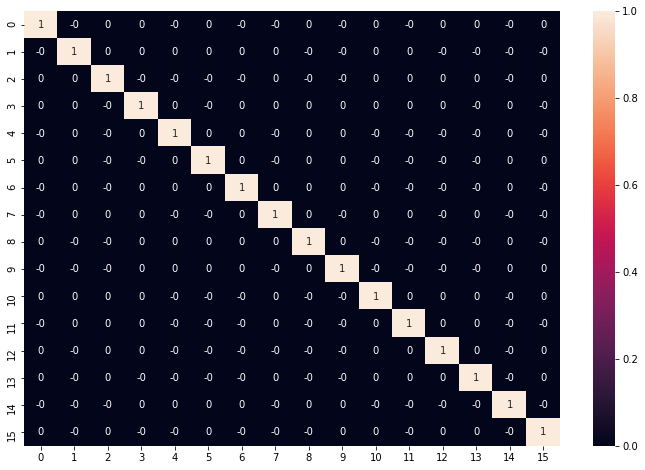

In [164]:
plt.figure(figsize=(12,8))
sns.heatmap(corrmat.round(2),annot=True)

In [165]:
pca_test=pca_final.transform(X_test)

In [166]:
pca_test.shape

(2110, 16)

In [167]:
from sklearn.linear_model import LogisticRegression

In [168]:
log_pca=LogisticRegression()

In [169]:
log_pca.fit(df_train_pca,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [182]:
predict_prob=log_pca.predict_proba(pca_test)

In [187]:
roc_auc_score(y_test,predict_prob[:,1])

0.8235216395890682

In [194]:
#Without specifying components 

In [199]:
pca_per=PCA(0.9)#specify the % of variance

In [201]:
df_train_pca2=pca_per.fit_transform(X_train)

In [209]:
df_train_pca2.shape

(4922, 14)

In [202]:
log_pca2=LogisticRegression()

In [203]:
log_pca2.fit(df_train_pca2,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [204]:
df_test_pca2=pca_per.transform(X_test)

In [210]:
df_test_pca2.shape

(2110, 14)

In [206]:
pred_test_pca2=log_pca2.predict_proba(df_test_pca2)

In [208]:
roc_auc_score(y_test,pred_test_pca2[:,1])

0.8235283864989834

In [211]:
confusion_matrix(y_test,log_pca2.predict(df_test_pca2))

array([[1369,  159],
       [ 294,  288]], dtype=int64)

In [213]:
accuracy_score(y_test,log_pca2.predict(df_test_pca2))

0.7853080568720379

## Graded

In [257]:
df=pd.read_clipboard()

In [258]:
df

,B1,B2,B3,B4,B5
0,1,0,4,0,3
1,2,3,4,3,2
2,3,3,2,4,2
3,4,4,3,5,4
4,5,1,4,2,2
5,4,2,4,3,4
6,4,3,1,5,5


In [232]:
np.corrcoef(df.T)

array([[ 1.        ,  0.3       , -0.22718473,  0.52548679,  0.26978187],
       [ 0.3       ,  1.        , -0.5253647 ,  0.93419873,  0.26978187],
       [-0.22718473, -0.5253647 ,  1.        , -0.7074523 , -0.46774194],
       [ 0.52548679,  0.93419873, -0.7074523 ,  1.        ,  0.45321163],
       [ 0.26978187,  0.26978187, -0.46774194,  0.45321163,  1.        ]])

In [233]:
np.corrcoef(df).shape

(7, 7)

In [230]:
df.corr()

,B1,B2,B3,B4,B5
B1,1.000000,0.300000,-0.227185,0.525487,0.269782
B2,0.300000,1.000000,-0.525365,0.934199,0.269782
B3,-0.227185,-0.525365,1.000000,-0.707452,-0.467742
B4,0.525487,0.934199,-0.707452,1.000000,0.453212
B5,0.269782,0.269782,-0.467742,0.453212,1.000000


In [217]:
pca=PCA()

In [218]:
pca.fit_transform(df)

array([[ 4.32763697, -0.86510265,  1.26638799,  0.0192282 , -0.02607712],
       [ 0.75438474, -1.25497871, -1.33150365, -0.55425185,  0.01802273],
       [-0.96124411, -0.95065343, -0.92645456,  1.11904645,  0.02145516],
       [-2.60315862, -0.01942434, -0.29100855, -0.88741404, -0.0637141 ],
       [ 1.47485205,  2.1797347 , -0.78910935,  0.6237979 , -0.0229388 ],
       [ 0.09908771,  1.04243975,  0.45272116, -0.88071865,  0.06717028],
       [-3.09155875, -0.13201534,  1.61896695,  0.56031199,  0.00608186]])

In [235]:
t=pd.DataFrame(pca.fit_transform(df))

In [236]:
t

,0,1,2,3,4
0,4.327637,-0.865103,1.266388,0.019228,-0.026077
1,0.754385,-1.254979,-1.331504,-0.554252,0.018023
2,-0.961244,-0.950653,-0.926455,1.119046,0.021455
3,-2.603159,-0.019424,-0.291009,-0.887414,-0.063714
4,1.474852,2.179735,-0.789109,0.623798,-0.022939
5,0.099088,1.042440,0.452721,-0.880719,0.067170
6,-3.091559,-0.132015,1.618967,0.560312,0.006082


In [248]:
t.corr()

,0,1,2,3,4
0,1.000000e+00,4.734842e-17,5.119789e-17,0.000000e+00,-3.248490e-17
1,4.734842e-17,1.000000e+00,2.973839e-17,6.827013e-17,-1.453605e-16
2,5.119789e-17,2.973839e-17,1.000000e+00,2.240072e-16,1.813598e-17
3,0.000000e+00,6.827013e-17,2.240072e-16,1.000000e+00,-9.690809e-17
4,-3.248490e-17,-1.453605e-16,1.813598e-17,-9.690809e-17,1.000000e+00


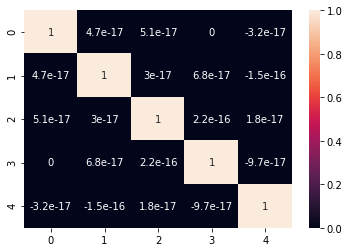

In [239]:
sns.heatmap(t.corr(),annot=True)

In [219]:
pca.explained_variance_ratio_

array([6.51886873e-01, 1.52836342e-01, 1.30717403e-01, 6.43810220e-02,
       1.78359842e-04])

In [240]:
pca_t=PCA(0.9)

In [242]:
tfeat=pca_t.fit_transform(df)

In [243]:
tfeat

array([[ 4.32763697, -0.86510265,  1.26638799],
       [ 0.75438474, -1.25497871, -1.33150365],
       [-0.96124411, -0.95065343, -0.92645456],
       [-2.60315862, -0.01942434, -0.29100855],
       [ 1.47485205,  2.1797347 , -0.78910935],
       [ 0.09908771,  1.04243975,  0.45272116],
       [-3.09155875, -0.13201534,  1.61896695]])

In [245]:
tfeatdf=pd.DataFrame(tfeat)

In [246]:
tfeatdf

,0,1,2
0,4.327637,-0.865103,1.266388
1,0.754385,-1.254979,-1.331504
2,-0.961244,-0.950653,-0.926455
3,-2.603159,-0.019424,-0.291009
4,1.474852,2.179735,-0.789109
5,0.099088,1.042440,0.452721
6,-3.091559,-0.132015,1.618967


In [247]:
tfeatdf.corr()

,0,1,2
0,1.000000e+00,4.734842e-17,5.119789e-17
1,4.734842e-17,1.000000e+00,2.973839e-17
2,5.119789e-17,2.973839e-17,1.000000e+00


In [267]:
df

,B1,B2,B3,B4,B5
0,1,0,4,0,3
1,2,3,4,3,2
2,3,3,2,4,2
3,4,4,3,5,4
4,5,1,4,2,2
5,4,2,4,3,4
6,4,3,1,5,5
